### Treść

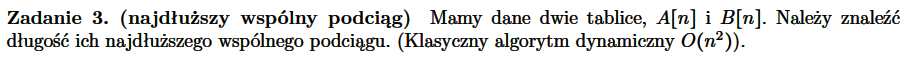

### Omówienie

$ f(i, j) $ - długość najdłuższego wspólnego podciągu, znajdującego się pomiędzy zerowym indeksem a indeksem $ i $. w tablicy $ A $ oraz między zerowym a $ j $. w tablicy $ B $.
<br><br>
- Podejście Top-down:
1. Tworzymy pomocniczą tablicę $ F $ o wymiarach $ n \times m $, a następnie wywołujemy funkcję rekurencyjną, która wyznacza najdłuższy wspólny podciąg. Akurat w tym algorytmie zaczynamy sprawdzanie obu ciągów od końca, aby ładniej wyglądał warunek końca rekurencji (wyjście wskaźnika poniżej zera), ale równie dobrze można sprawdzać stringi w drugą stronę. Implementacja jest stosunkowo prosta i czytelna, i opiera się na sprawdzeniu wszystkich możliwych w danym momencie rozwiązań i zapisaniu w tablicy $ F $ najlepszego z nich dla danych wartości $ i $ oraz $ j $.
<br><br>
- Podejście Bottom-up:
1. Wypełniamy pierwszy wiersz i pierwszą kolumnę tablicy $ F $, zgodnie z powyższym opisem funkcji $ f $, a więc w pierwszym wierszu umieszczamy wartość 0, jeżeli $ A[0] $ nie znajduje się w podciągu $ B[0], B[1], ..., B[j] $ oraz $ 1 $, jeżeli się w nim znajduje. Podobnie dla 1. kolumy i sprawdzania, czy $ B[0] $ jest w ciągu $ A $. (Łatwo można zauważyć, ze po znalezieniu pierwszego wystąpienia danej wartości w drugim z ciągów, wszystkie kolejne wartości w wierszu/kolumnie to będą jedynki, bo już mamy znaleziony $ 1 $ wspólny podciąg, kończący się przed obecnie sprawdzanym indeksem), <br>
2. W pętli wypełniamy pozostałą część tablicy $ F $. Jeżeli $ A[i] = B[j] $, czyli obecnie sprawdzane znaki w obu ciągach są takie same, możemy przedłużyć najdłuższy dotychczas znaleziony podciąg o $ 1 $. Ponieważ obecnie jesteśmy na indeksach $ i, j $, długość poprzedniego najdłuższego podciągu znajduje się na pozycji $ i - 1, j - 1 $ w tablicy $ F $, więc na polu $ F[i][j] $ zapisujemy wartość $ F[i - 1][j - 1] + 1 $, <br>
Jeżeli natomiast $ A[i] \neq B[j] $, bierzemy jeden z dwóch możliwie najdłuższych obecnie podciągów, czyli albo ten, który kończy się na $ i $. indeksie w $ A $ i na $ j - 1 $. w $ B $ lub ten, który kończy się na $ j $. indeksie w $ B $ i na $ i - 1 $. w $ A $. Nie bierzemy pod uwagę już ciągu, który kończy się na $ i - 1 $. indeksie w $ A $ i na $ j - 1 $. w $ B $, bo jest on podciągiem dwóch wcześniej sprawdzanych ciągów, więc na pewno najdłuższy znaleziony w nim wspólny podciąg będzie nie dłuższy niż jeden z dwóch sprawdzancyh podciągów.

Złożoność: $ O(n^2) $

### Implementacja

#### Top-down (około $ 3x $ wolniejsza niż Bottom-up)

In [1]:
def lcs_td(A, B):
    if not A or not B: return 0
    n = len(A)
    m = len(B)
    F = [[None] * m for _ in range(n)]
    
    def recur(i, j):
        if i < 0 or j < 0: return 0
        if F[i][j] is not None: return F[i][j]
        
        F[i][j] = max((A[i] == B[j]) + recur(i - 1, j - 1),
                      recur(i - 1, j),
                      recur(i, j - 1))
        return F[i][j]
    # Start from the back to make it easier to check
    # if one of the sequences has already been exhausted
    return recur(n - 1, m - 1)

###### Kilka testów

In [2]:
a = 'aabcaca'
b = 'abaa'

print(lcs_td(a, b))

4


In [3]:
a = "abcde"
b = "ace"

print(lcs_td(a, b))

3


In [4]:
a = "bsbininm"
b = "jmjkbkjkv"

print(lcs_td(a, b))

1


#### Bottom-up

Całkiem niezła implementacja. Osiąga takie wyniki na leetcode:
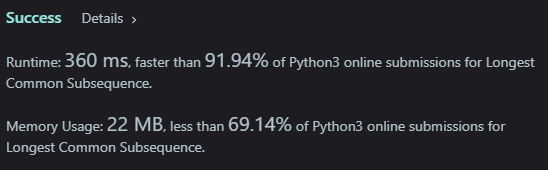
LINK do problemu: https://leetcode.com/problems/longest-common-subsequence/submissions/

In [5]:
def lcs_bu(A, B):
    if not A or not B: return 0
    n = len(A)
    m = len(B)
    F = [[0] * m for _ in range(n)]
    
    F[0][0] = int(A[0] == B[0])
    # Fill the first row (compare the first value of the array A
    # with all the values from the B array)
    for j in range(1, m):
        if F[0][j - 1] or A[0] == B[j]:
            F[0][j] = 1
    # Fill the first column (compare the first value of the array B
    # with all the values from the A array)
    for i in range(1, n):
        if F[i - 1][0] or B[0] == A[i]:
            F[i][0] = 1
    # Fill the remaining array based on values previously calculated
    for i in range(1, n):
        for j in range(1, m):
            if A[i] == B[j]:
                F[i][j] = F[i - 1][j - 1] + 1
            else:
                F[i][j] = max(F[i - 1][j], F[i][j - 1])
    
    print(*F, sep='\n')
    
    return F[n - 1][m - 1]

###### Kilka testów

In [6]:
a = 'aabcaca'
b = 'abaa'

print(lcs_bu(a, b))

[1, 1, 1, 1]
[1, 1, 2, 2]
[1, 2, 2, 2]
[1, 2, 2, 2]
[1, 2, 3, 3]
[1, 2, 3, 3]
[1, 2, 3, 4]
4


In [7]:
a = "abcde"
b = "ace"

print(lcs_bu(a, b))

[1, 1, 1]
[1, 1, 1]
[1, 2, 2]
[1, 2, 2]
[1, 2, 3]
3


In [8]:
a = "bsbininm"
b = "jmjkbkjkv"

print(lcs_bu(a, b))

[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
1


### (Dodatkowo) Wypisywanie rozwiązania

Opis ze strony GeeksforGeeks <br>
LINK: https://www.geeksforgeeks.org/printing-longest-common-subsequence/ <br>
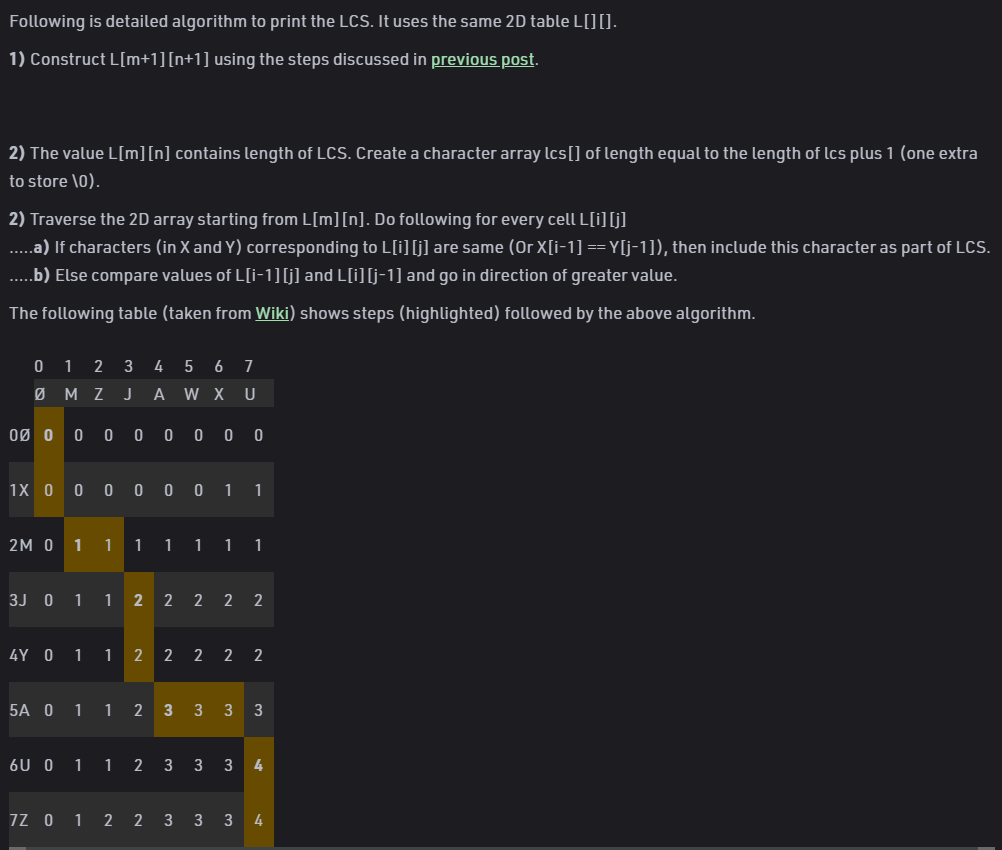

Konieczna jest taka modyfikacja algorytmu, znajdującego najdłuższy wspólny podciąg, aby zwracał on tablicę, na której pracował.

#### Bottom-up

In [9]:
def lcs_bu(A, B):
    if not A or not B: return 0
    n = len(A)
    m = len(B)
    F = [[0] * m for _ in range(n)]
    
    F[0][0] = int(A[0] == B[0])
    # Fill the first row (compare the first value of the array A
    # with all the values from the B array)
    for j in range(1, m):
        if F[0][j - 1] or A[0] == B[j]:
            F[0][j] = 1
    # Fill the first column (compare the first value of the array B
    # with all the values from the A array)
    for i in range(1, n):
        if F[i - 1][0] or B[0] == A[i]:
            F[i][0] = 1
    # Fill the remaining array based on values previously calculated
    for i in range(1, n):
        for j in range(1, m):
            if A[i] == B[j]:
                F[i][j] = F[i - 1][j - 1] + 1
            else:
                F[i][j] = max(F[i - 1][j], F[i][j - 1])
    
    return F


def get_lcs(A, B):
    F = lcs_bu(A, B)
    n = len(A)
    m = len(B)
    length = F[n - 1][m - 1]
    if not length: return []
    R = [None] * length
    
    i = n - 1
    j = m - 1
    k = length - 1
    while i >= 0 and j >= 0:
        if A[i] == B[j]:
            R[k] = A[i]
            k -= 1
            i -= 1
            j -= 1
        elif F[i - 1][j] < F[i][j - 1]:
            j -= 1
        else:
            i -= 1
            
    if not R[0]:
        for i in range(n):
            if F[i][0]: R[0] = B[0]; break
        else:
            for j in range(m):
                if F[0][j]: R[0] = A[0]; break        
            
    return R

###### Kilka testów

In [10]:
a = 'aabcaca'
b = 'abaa'

print(get_lcs(a, b))

['a', 'b', 'a', 'a']


In [11]:
a = "abcde"
b = "ace"

print(get_lcs(a, b))

['a', 'c', 'e']


In [12]:
a = "ababaaabsbininm"
b = "jmjkbkjkv"

print(get_lcs(a, b))

['b']
